#### import

In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


#### prepare-data

In [25]:
df = pd.read_excel('mun-test.xlsx')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           230 non-null    object 
 1   latitude       230 non-null    float64
 2   longitude      230 non-null    float64
 3   uvb            230 non-null    float64
 4   e              230 non-null    float64
 5   stl1           230 non-null    float64
 6   sp             230 non-null    float64
 7   tp             230 non-null    float64
 8   d2m            230 non-null    float64
 9   minTemp        230 non-null    float64
 10  meanTemp       230 non-null    float64
 11  maxTemp        230 non-null    float64
 12  RH             230 non-null    float64
 13  WS             230 non-null    float64
 14  sunrise        230 non-null    object 
 15  sunset         230 non-null    object 
 16  durationOfDay  230 non-null    float64
 17  age            230 non-null    int64  
 18  DI        

In [26]:
df.head()

,date,latitude,longitude,uvb,e,stl1,sp,tp,d2m,minTemp,meanTemp,maxTemp,RH,WS,sunrise,sunset,durationOfDay,age,DI
0,2022/05/31,12.680,101.099998,101986.826079,-0.000165,303.948850,100266.750543,0.000182,26.096522,29.395654,30.453699,32.623438,0.776135,3.093420,05:50:16,18:39:05,12.813611,12,100
1,2022/06/08,12.725,101.133003,110403.489903,-0.000149,303.368648,100397.859566,0.000006,25.161524,28.558252,30.137234,33.229883,0.747703,2.881435,05:50:19,18:41:22,12.850833,4,100
2,2022/06/08,12.721,101.106003,110490.141480,-0.000141,303.714852,100418.703226,0.000004,25.099450,28.691309,30.252224,33.314600,0.740049,2.964427,05:50:26,18:41:28,12.850556,5,100
3,2023/09/06,12.722,101.133003,76737.018758,-0.000139,303.331610,100499.797180,0.000031,26.129480,28.933252,30.349018,32.677148,0.782323,2.470756,06:06:05,18:25:06,12.316944,4,0
4,2023/09/06,12.709,101.123001,77119.543035,-0.000137,303.397216,100534.249900,0.000034,26.079185,29.019922,30.343399,32.502588,0.780253,2.588736,06:06:08,18:25:08,12.316667,5,70


In [27]:
df.describe()

,latitude,longitude,uvb,e,stl1,sp,tp,d2m,minTemp,meanTemp,maxTemp,RH,WS,durationOfDay,age,DI
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,13.190239,100.860517,79448.383888,-0.000142,302.514240,100264.434254,0.000335,25.286317,27.581771,29.607197,32.884512,0.782481,2.362608,12.284000,4.813043,45.730435
std,0.333255,6.588112,24135.191090,0.000030,1.201248,292.615808,0.000604,1.745405,1.166894,1.042838,1.571728,0.091726,1.195033,0.319759,2.483976,40.892942
min,12.653000,1.443000,37277.927147,-0.000203,299.842104,98341.219266,0.000000,18.586387,24.701807,27.004847,28.240625,0.483512,0.498244,11.729444,1.000000,0.000000
25%,12.877500,101.105003,56728.935499,-0.000165,301.642985,100075.144560,0.000016,25.274489,26.623315,28.923175,31.843286,0.745649,1.712787,12.072222,3.000000,0.000000
50%,13.207500,101.303501,87188.337156,-0.000145,302.322142,100248.429893,0.000144,25.759881,27.675317,29.818875,33.071924,0.797723,2.118812,12.254444,4.000000,30.000000
75%,13.478000,101.440500,100465.190811,-0.000120,303.435919,100439.265648,0.000346,26.101237,28.379480,30.376615,34.021509,0.829078,3.091711,12.552778,6.000000,100.000000
max,13.770000,101.803001,114908.554814,-0.000055,307.896394,101121.640521,0.002934,26.656090,29.894678,32.313337,37.713770,0.930833,6.332383,12.861111,12.000000,100.000000


In [28]:
df.drop(['date','sunrise','sunset'], axis=1, inplace=True)

In [29]:
df.head()

,latitude,longitude,uvb,e,stl1,sp,tp,d2m,minTemp,meanTemp,maxTemp,RH,WS,durationOfDay,age,DI
0,12.680,101.099998,101986.826079,-0.000165,303.948850,100266.750543,0.000182,26.096522,29.395654,30.453699,32.623438,0.776135,3.093420,12.813611,12,100
1,12.725,101.133003,110403.489903,-0.000149,303.368648,100397.859566,0.000006,25.161524,28.558252,30.137234,33.229883,0.747703,2.881435,12.850833,4,100
2,12.721,101.106003,110490.141480,-0.000141,303.714852,100418.703226,0.000004,25.099450,28.691309,30.252224,33.314600,0.740049,2.964427,12.850556,5,100
3,12.722,101.133003,76737.018758,-0.000139,303.331610,100499.797180,0.000031,26.129480,28.933252,30.349018,32.677148,0.782323,2.470756,12.316944,4,0
4,12.709,101.123001,77119.543035,-0.000137,303.397216,100534.249900,0.000034,26.079185,29.019922,30.343399,32.502588,0.780253,2.588736,12.316667,5,70


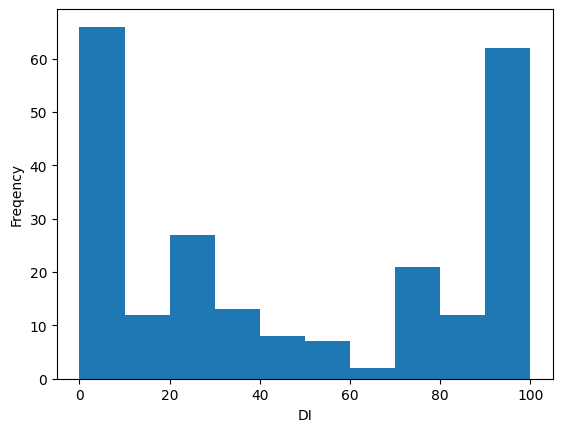

In [30]:
plt.hist(df['DI'])
plt.xlabel("DI")
plt.ylabel('Freqency')
plt.show()

#### เลือกตัวแปรอิสระ (X) และตัวแปรตาม (y)

In [31]:
X =df.iloc[:,:-1]
y =df.iloc[:,-1]

#### แบ่งข้อมูลเป็นชุดการฝึกและทดสอบ

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0)

#### สร้างและฝึกโมเดล RandomForestRegressor

In [33]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

#### predict

In [34]:
y_pred = rf.predict(x_test)

#### คำนวณ Mean Squared Error

In [35]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 750.1177431034482


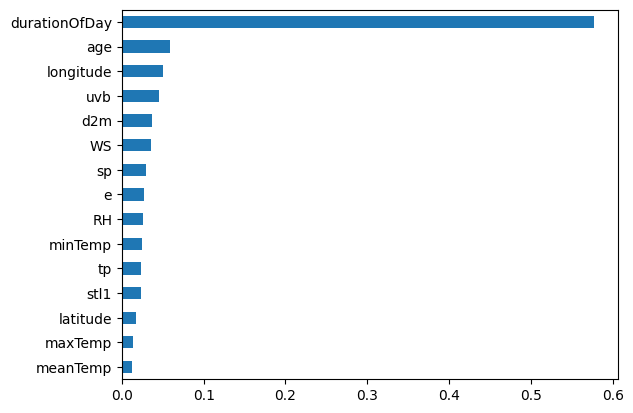

In [36]:
model_ranks = pd.Series(rf.feature_importances_, index=x_train.columns, name="Importance").sort_values()
ax = model_ranks.plot(kind='barh')

#### Calculate Residuals

In [37]:
residuals = y_test - y_pred

#### Calculate RSS

In [38]:
rss = sum(residuals**2)
print("Residual Sum of Squares (RSS):", rss)

Residual Sum of Squares (RSS): 43506.82909999999


#### Get feature importances

In [39]:
feature_importances  = rf.feature_importances_

#### Create a DataFrame to store feature importances with corresponding feature names

In [40]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})


#### Sort the DataFrame by importance in descending order

In [41]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#### Print feature importances

In [42]:
print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
          Feature  Importance
13  durationOfDay    0.577349
14            age    0.058323
1       longitude    0.049741
2             uvb    0.045764
7             d2m    0.037280
12             WS    0.035845
5              sp    0.029742
3               e    0.026728
11             RH    0.025815
8         minTemp    0.024118
6              tp    0.023623
4            stl1    0.023171
0        latitude    0.017099
10        maxTemp    0.013334
9        meanTemp    0.012069


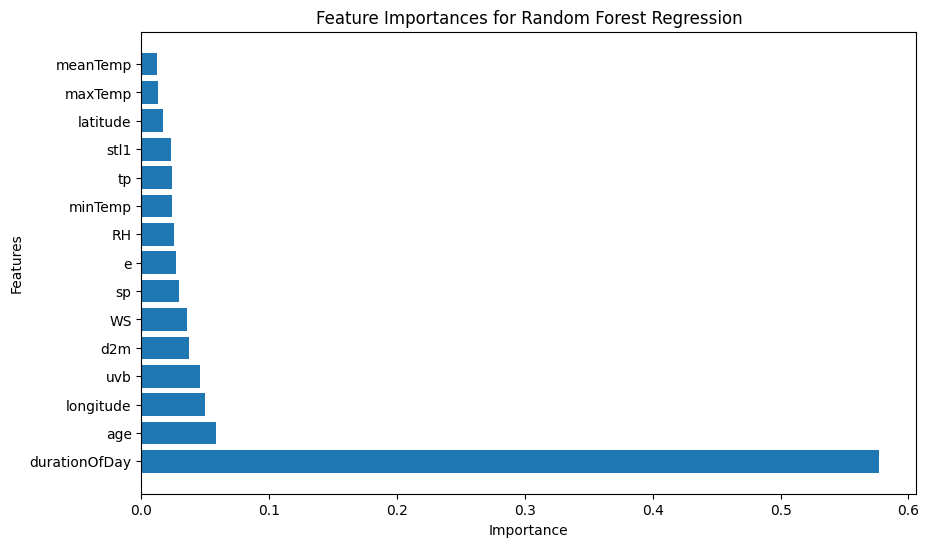

In [43]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances for Random Forest Regression')
plt.show()